# **20230508**

## 셀프 주유소는 정말 저렴할까

### 01 Selenium 사용하기

In [14]:
from selenium import webdriver

import pandas as pd
import seaborn as sns
import numpy as np

In [15]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pyperclip


In [50]:
options = webdriver.ChromeOptions()
options.add_argument('--disable-gpu')

driver = webdriver.Chrome('../chromedriver_win32/chromedriver.exe',options=options)
driver.get('https://www.naver.com')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16700\1853183267.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../chromedriver_win32/chromedriver.exe',options=options)


In [6]:
#driver.save_screenshot('../001.png')

True

In [57]:
# naver 자동로그인

userid = ''
userpw = 

options = webdriver.ChromeOptions()
options.add_argument('--disable-gpu')

driver = webdriver.Chrome('../chromedriver_win32/chromedriver.exe',options=options)
driver.implicitly_wait(3)
driver.get('https://nid.naver.com/nidlogin.login')

login_id = driver.find_element(By.NAME, 'id').click()
pyperclip.copy(userid)
login_pw = driver.find_element(By.NAME, 'id').send_keys(Keys.CONTROL,'v')

login_id = driver.find_element(By.NAME, 'pw').click()
pyperclip.copy(userpw)
login_pw = driver.find_element(By.NAME, 'pw').send_keys(Keys.CONTROL,'v')

driver.find_element(By.XPATH, '//*[@id="log.login"]').click()
driver.get('https://mail.naver.com/')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16700\3529339091.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../chromedriver_win32/chromedriver.exe',options=options)


In [20]:
xpath = '''//*[@id="log.login"]'''
# 네이버가 막아둠^^
#driver.find_element(By.XPATH, xpath).click()

In [21]:
driver.close()

### 02 서울시 구별 주유소 가격 정보 얻기

In [28]:
options = webdriver.ChromeOptions()
options.add_argument('--disable-gpu')

driver = webdriver.Chrome('../chromedriver_win32/chromedriver.exe',options=options)
driver.get('https://www.opinet.co.kr/searRgSelect.do')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21372\3030815301.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../chromedriver_win32/chromedriver.exe',options=options)


In [29]:
xpath = '//*[@id="SIGUNGU_NM0"]'

gu_list_raw = driver.find_element(By.XPATH,xpath)
gu_list = gu_list_raw.find_elements(By.TAG_NAME,'option')
len(gu_list)

26

In [30]:
# gu_names = [option.get_attribute('value') for option i gu_list]
gu_names=[]

for option in gu_list:
    gu_names.append(option.get_attribute('value'))

gu_names

['',
 '강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [31]:
#gu_names.remove('')
gu_names[:5]

['', '강남구', '강동구', '강북구', '강서구']

---

# **20230509**

In [32]:
# 강남구 조회하기
element = driver.find_element(By.ID, 'SIGUNGU_NM0')
element.send_keys(gu_names[0])

In [22]:
# 조회 버튼 누르기
element_sel_gu = driver.find_element(By.XPATH,'//*[@id="searRgSelect"]')
element_sel_gu.click()

In [23]:
#엑셀 저장 버튼 누르기
element_get_exel = driver.find_element(By.XPATH,'//*[@id="glopopd_excel"]')
element_get_exel.click()

In [ ]:
import time
from tqdm import tqdm

for gu in tqdm(gu_names):
    element = driver.find_element(By.ID, 'SIGUNGU_NM0')
    element.send_keys(gu)

    time.sleep(2)

    element_sel_gu = driver.find_element(By.XPATH,'//*[@id="searRgSelect"]')
    element_sel_gu.click()

    time.sleep(1)

    element_get_exel = driver.find_element(By.XPATH,'//*[@id="glopopd_excel"]')
    element_get_exel.click()

    time.sleep(1)

In [34]:
driver.close()

### 구별 주유 가격에 대한 데이터의 정리

In [26]:
from glob import glob

In [37]:
glob('../2023Seoul_OilStore/*구.xls')   # return list

['../2023Seoul_OilStore\\강남구.xls',
 '../2023Seoul_OilStore\\강동구.xls',
 '../2023Seoul_OilStore\\강북구.xls',
 '../2023Seoul_OilStore\\강서구.xls',
 '../2023Seoul_OilStore\\관악구.xls',
 '../2023Seoul_OilStore\\광진구.xls',
 '../2023Seoul_OilStore\\구로구.xls',
 '../2023Seoul_OilStore\\금천구.xls',
 '../2023Seoul_OilStore\\노원구.xls',
 '../2023Seoul_OilStore\\도봉구.xls',
 '../2023Seoul_OilStore\\동대문구.xls',
 '../2023Seoul_OilStore\\동작구.xls',
 '../2023Seoul_OilStore\\마포구.xls',
 '../2023Seoul_OilStore\\서대문구.xls',
 '../2023Seoul_OilStore\\서초구.xls',
 '../2023Seoul_OilStore\\성동구.xls',
 '../2023Seoul_OilStore\\성북구.xls',
 '../2023Seoul_OilStore\\송파구.xls',
 '../2023Seoul_OilStore\\양천구.xls',
 '../2023Seoul_OilStore\\영등포구.xls',
 '../2023Seoul_OilStore\\용산구.xls',
 '../2023Seoul_OilStore\\은평구.xls',
 '../2023Seoul_OilStore\\종로구.xls',
 '../2023Seoul_OilStore\\중구.xls',
 '../2023Seoul_OilStore\\중랑구.xls']

In [40]:
station_file_names = glob('../2023Seoul_OilStore/*구.xls')

In [43]:
# read_excel 할 때는 우선 header 찾기 필수
pd.read_excel(station_file_names[0],header=2).head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1632,1553,-
1,서울특별시,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,현대오일뱅크,02-2226-4963,Y,1898,1639,1565,-
2,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1872,1679,1654,-
3,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1687,1559,-
4,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,1896,1694,1669,-


In [44]:
tmp_raw = []

for file_name in station_file_names:
    tmp = pd.read_excel(file_name, header=2)    # => DataFrame
    tmp_raw.append(tmp)                         # => list[df,df,df,...]

station_raw = pd.concat(tmp_raw)

In [45]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1632,1553,-
1,서울특별시,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,현대오일뱅크,02-2226-4963,Y,1898,1639,1565,-
2,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1872,1679,1654,-
3,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1687,1559,-
4,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,1896,1694,1669,-


In [46]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 0 to 12
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      441 non-null    object
 1   상호      441 non-null    object
 2   주소      441 non-null    object
 3   상표      441 non-null    object
 4   전화번호    441 non-null    object
 5   셀프여부    441 non-null    object
 6   고급휘발유   441 non-null    object
 7   휘발유     441 non-null    int64 
 8   경유      441 non-null    int64 
 9   실내등유    441 non-null    object
dtypes: int64(2), object(8)
memory usage: 37.9+ KB


In [52]:
stations = pd.DataFrame({
          '상호': station_raw['상호']
        , '주소': station_raw['주소']
        , '가격': station_raw['휘발유']
        , '셀프': station_raw['셀프여부']
        , '상표': station_raw['상표']
})

stations.head()

,상호,주소,가격,셀프,상표
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1632,Y,SK에너지
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1639,Y,현대오일뱅크
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1679,Y,현대오일뱅크
3,방죽주유소,서울 강남구 밤고개로 215 (율현동),1687,Y,GS칼텍스
4,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1694,Y,SK에너지


In [71]:
stations['주소'][0]

0           서울 강남구  헌릉로 731 (세곡동)
0    서울특별시 강동구  천호대로 1246 (둔촌제2동)
0            서울 강북구 삼양로 316 (수유동)
0            서울 강서구 강서로 154 (화곡동)
0            서울 관악구 신림로 290 (신림동)
0            서울 광진구 천호대로 584 (능동)
0            서울 구로구 오리로 1299 (궁동)
0           서울 금천구 서부샛길 674 (가산동)
0            서울 노원구 월계로 252 (월계동)
0            서울 도봉구 방학로 142 (방학동)
0         서울 동대문구 답십리로 223 (답십리동)
0                서울 동작구 여의대방로 214
0                 서울 마포구 월드컵북로 62
0           서울 서대문구 통일로 455 (홍제동)
0            서울 서초구 양재대로12길 73-71
0           서울 성동구 고산자로 307 (마장동)
0           서울 성북구 돌곶이로 142 (장위동)
0            서울 송파구 삼학사로 50 (석촌동)
0          서울 양천구 가로공원로 165 (신월동)
0          서울 영등포구 가마산로 367 (대림동)
0           서울 용산구 한남대로 204 (한남동)
0           서울 은평구 통일로 1151 (진관동)
0             서울 종로구 율곡로 58 (경운동)
0                   서울 중구 다산로 233
0            서울 중랑구 동일로 636 (면목동)
Name: 주소, dtype: object

In [72]:
stations['주소'].iloc[0].split()

['서울', '강남구', '헌릉로', '731', '(세곡동)']

In [73]:
[eachAddress.split()[1] for eachAddress in stations['주소']][:5]

['강남구', '강남구', '강남구', '강남구', '강남구']

In [74]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,상호,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1632,Y,SK에너지,강남구
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1639,Y,현대오일뱅크,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1679,Y,현대오일뱅크,강남구
3,방죽주유소,서울 강남구 밤고개로 215 (율현동),1687,Y,GS칼텍스,강남구
4,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1694,Y,SK에너지,강남구


In [75]:
stations

,상호,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1632,Y,SK에너지,강남구
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1639,Y,현대오일뱅크,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1679,Y,현대오일뱅크,강남구
3,방죽주유소,서울 강남구 밤고개로 215 (율현동),1687,Y,GS칼텍스,강남구
4,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1694,Y,SK에너지,강남구
...,...,...,...,...,...,...
8,신내주유소,서울 중랑구 용마산로 705 (신내동),1658,Y,SK에너지,중랑구
9,(주)태영 구도일주유소 한인,서울 중랑구 망우로 170 (상봉동),1665,Y,S-OIL,중랑구
10,용마로주유소,서울 중랑구 용마산로 309 (면목동),1678,Y,SK에너지,중랑구
11,범아주유소,서울 중랑구 동일로 881 (묵동),1689,N,S-OIL,중랑구


In [76]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 0 to 12
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      441 non-null    object
 1   주소      441 non-null    object
 2   가격      441 non-null    int64 
 3   셀프      441 non-null    object
 4   상표      441 non-null    object
 5   구       441 non-null    object
dtypes: int64(1), object(5)
memory usage: 40.3+ KB


In [55]:
stations['구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [81]:
stations['가격'].isnull().sum()

0

In [84]:
stations[stations['가격'] == '-']

,상호,주소,가격,셀프,상표,구


In [86]:
# 연속형 데이터로 dtype변경

stations['가격'] = [float(value) for value in stations['가격']]

In [89]:
# reset index

stations.reset_index(inplace=True)
stations['주소'][0]

'서울 강남구  헌릉로 731 (세곡동)'

In [91]:
del stations['index']

In [92]:
stations.head()

,상호,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1632.0,Y,SK에너지,강남구
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1639.0,Y,현대오일뱅크,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1679.0,Y,현대오일뱅크,강남구
3,방죽주유소,서울 강남구 밤고개로 215 (율현동),1687.0,Y,GS칼텍스,강남구
4,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1694.0,Y,SK에너지,강남구


---

### 셀프 주유소는 정말 저렴한지 boxplot으로 확인

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform

In [99]:
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

<Axes: title={'center': '가격'}, xlabel='셀프'>

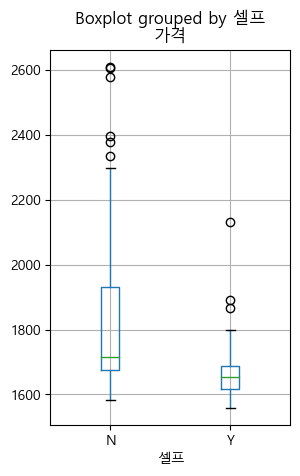

In [125]:
# 셀프 (기준) 주유소 가격(비교대상)
stations.boxplot(
      column='가격'
    , by='셀프'
    , figsize=(3,5)
  
)

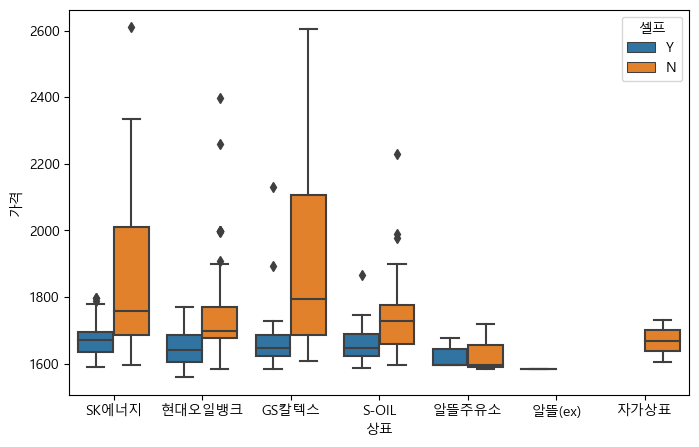

In [128]:
plt.figure(figsize=(8,5))

sns.boxplot(
      data=stations
    , x='상표'
    , y='가격'
    , hue='셀프'
    #, palette='Set3'
)

plt.show()

### 서울시 구별 주유 가격 확인하기

In [131]:
import json
import folium
import requests

In [135]:
# 가격 상위 10개
stations.sort_values(by='가격', ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
427,서남주유소,서울 중구 통일로 30,2610.0,N,SK에너지,중구
392,서계주유소,서울 용산구 청파로 367 (청파동),2605.0,N,GS칼텍스,용산구
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구
32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구
426,필동주유소,서울 중구 퇴계로 196 (필동2가),2379.0,N,GS칼텍스,중구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2335.0,N,SK에너지,강남구
425,약수주유소,서울 중구 다산로 173,2297.0,N,GS칼텍스,중구
391,한석주유소,서울 용산구 이촌로 164,2286.0,N,SK에너지,용산구
30,갤러리아주유소,서울 강남구 압구정로 426,2275.0,N,SK에너지,강남구
417,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2260.0,N,GS칼텍스,종로구


In [136]:
# 가격 하위 10개
stations.sort_values(by='가격', ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
180,(주)자연에너지 국민주유소,서울 동대문구 답십리로 223 (답십리동),1559.0,Y,현대오일뱅크,동대문구
428,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1559.0,Y,현대오일뱅크,중랑구
279,원천주유소,서울 성북구 돌곶이로 142 (장위동),1583.0,N,알뜰주유소,성북구
233,만남의광장주유소,서울 서초구 양재대로12길 73-71,1584.0,Y,알뜰(ex),서초구
164,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1585.0,Y,현대오일뱅크,도봉구
280,이케이에너지(주) 강산제2주유소,서울 성북구 보국문로 52,1585.0,Y,현대오일뱅크,성북구
281,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1585.0,Y,GS칼텍스,성북구
48,(주)서울에너지 시민주유소,서울 강북구 인수봉로 185 (수유동),1585.0,N,현대오일뱅크,강북구
47,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1585.0,Y,현대오일뱅크,강북구
49,씨앤에스유통㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),1588.0,Y,S-OIL,강북구


In [209]:
# 구별(index) 가격(values) 평균

gu_data = pd.pivot_table(stations, index=['구'],values=['가격'],aggfunc=np.mean)

gu_data.head()

,가격
구,
강남구,1924.705882
강동구,1735.307692
강북구,1609.333333
강서구,1681.818182
관악구,1718.571429


In [210]:
gu_data.sort_values(by='가격', ascending=False).head(10)

,가격
구,
용산구,2121.416667
중구,2004.100000
종로구,1953.222222
강남구,1924.705882
성동구,1779.500000
강동구,1735.307692
서초구,1719.433333
관악구,1718.571429
구로구,1713.050000


In [211]:
# 서울시 구 경계선 정보

geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [212]:
map = folium.Map(location=[37.550881,126.985083], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str
               ,data = gu_data
               ,columns = [gu_data.index, '가격']
               ,fill_color = 'YlGnBu'
               ,key_on = 'feature.id')

map

c:\Users\user\anaconda3\envs\pandas-dev\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


### 서울시 주유 가격 상하위 10개 주유소 지도에 표기하기

In [213]:
# 상위 10개
oil_price_top10 = stations.sort_values(by='가격', ascending=False,ignore_index=True).head(10)
oil_price_top10

,상호,주소,가격,셀프,상표,구
0,서남주유소,서울 중구 통일로 30,2610.0,N,SK에너지,중구
1,서계주유소,서울 용산구 청파로 367 (청파동),2605.0,N,GS칼텍스,용산구
2,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구
3,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구
4,필동주유소,서울 중구 퇴계로 196 (필동2가),2379.0,N,GS칼텍스,중구
5,SK논현주유소,서울 강남구 논현로 747 (논현동),2335.0,N,SK에너지,강남구
6,약수주유소,서울 중구 다산로 173,2297.0,N,GS칼텍스,중구
7,한석주유소,서울 용산구 이촌로 164,2286.0,N,SK에너지,용산구
8,갤러리아주유소,서울 강남구 압구정로 426,2275.0,N,SK에너지,강남구
9,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2260.0,N,GS칼텍스,종로구


In [214]:
# 하위 10개
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True,ignore_index=True).head(10)
oil_price_bottom10

,상호,주소,가격,셀프,상표,구
0,(주)자연에너지 국민주유소,서울 동대문구 답십리로 223 (답십리동),1559.0,Y,현대오일뱅크,동대문구
1,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1559.0,Y,현대오일뱅크,중랑구
2,원천주유소,서울 성북구 돌곶이로 142 (장위동),1583.0,N,알뜰주유소,성북구
3,만남의광장주유소,서울 서초구 양재대로12길 73-71,1584.0,Y,알뜰(ex),서초구
4,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1585.0,Y,현대오일뱅크,도봉구
5,이케이에너지(주) 강산제2주유소,서울 성북구 보국문로 52,1585.0,Y,현대오일뱅크,성북구
6,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1585.0,Y,GS칼텍스,성북구
7,(주)서울에너지 시민주유소,서울 강북구 인수봉로 185 (수유동),1585.0,N,현대오일뱅크,강북구
8,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1585.0,Y,현대오일뱅크,강북구
9,씨앤에스유통㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),1588.0,Y,S-OIL,강북구


In [215]:
oil_price_top10['주소'][0]

'서울 중구 통일로 30'

In [216]:
url1 = 'https://dapi.kakao.com/v2/local/search/address.json?query='+ oil_price_top10['주소'][0]
headers = {"Authorization": "KakaoAK 6341d1e76477fbac498a469adc87108d"}
result1 = json.loads(str(requests.get(url1, headers=headers).text))
result1['documents'][0]['y'] ,result1['documents'][0]['x'] 

('37.5583842097102', '126.972171955834')

In [217]:
# 상위 10개 좌표 구하기

station_xlot=[]
station_ylot=[]

for n in tqdm(oil_price_top10.index):
    try:
        url1 = 'https://dapi.kakao.com/v2/local/search/address.json?query='+ oil_price_top10['주소'][n]
        headers = {"Authorization": "KakaoAK 6341d1e76477fbac498a469adc87108d"}
        result1 = json.loads(str(requests.get(url1, headers=headers).text))

        xlot = result1['documents'][0]['x']
        ylot = result1['documents'][0]['y']

        station_xlot.append(xlot)
        station_ylot.append(ylot)
    
    except:
        station_xlot.append(np.nan)
        station_ylot.append(np.nan)
        print('Here is nan!')

len(station_xlot)

100%|██████████| 10/10 [00:00<00:00, 14.03it/s]


10

In [218]:
station_xlot[:5]

['126.972171955834',
 '126.968993700509',
 '127.047114626083',
 '127.035822681258',
 '126.993676318183']

In [219]:
oil_price_top10['ylot'] = station_ylot
oil_price_top10['xlot'] = station_xlot

In [230]:
oil_price_top10

,상호,주소,가격,셀프,상표,구,ylot,xlot
0,서남주유소,서울 중구 통일로 30,2610.0,N,SK에너지,중구,37.5583842097102,126.972171955834
1,서계주유소,서울 용산구 청파로 367 (청파동),2605.0,N,GS칼텍스,용산구,37.5523662854224,126.968993700509
2,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구,37.5115512804432,127.047114626083
3,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구,37.5176692766197,127.035822681258
4,필동주유소,서울 중구 퇴계로 196 (필동2가),2379.0,N,GS칼텍스,중구,37.5608896587695,126.993676318183
5,SK논현주유소,서울 강남구 논현로 747 (논현동),2335.0,N,SK에너지,강남구,37.5185333217982,127.028244442649
6,약수주유소,서울 중구 다산로 173,2297.0,N,GS칼텍스,중구,37.5590367888841,127.012667988504
7,한석주유소,서울 용산구 이촌로 164,2286.0,N,SK에너지,용산구,37.5215921464571,126.965360511446
8,갤러리아주유소,서울 강남구 압구정로 426,2275.0,N,SK에너지,강남구,37.5268171796175,127.04353234534
9,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2260.0,N,GS칼텍스,종로구,37.5745415909136,126.966616657335


In [220]:
# 하위 10개 좌표 구하기

station_xlot=[]
station_ylot=[]

for n in tqdm(oil_price_bottom10.index):
    try:
        url1 = 'https://dapi.kakao.com/v2/local/search/address.json?query='+ oil_price_bottom10['주소'][n]
        headers = {"Authorization": "KakaoAK 6341d1e76477fbac498a469adc87108d"}
        result1 = json.loads(str(requests.get(url1, headers=headers).text))

        xlot = result1['documents'][0]['x']
        ylot = result1['documents'][0]['y']

        station_xlot.append(xlot)
        station_ylot.append(ylot)
    
    except:
        station_xlot.append(np.nan)
        station_ylot.append(np.nan)
        print('Here is nan!')

len(station_xlot)

100%|██████████| 10/10 [00:00<00:00, 14.80it/s]


10

In [221]:
oil_price_bottom10['ylot'] = station_ylot
oil_price_bottom10['xlot'] = station_xlot

In [222]:
oil_price_bottom10.head()

,상호,주소,가격,셀프,상표,구,ylot,xlot
0,(주)자연에너지 국민주유소,서울 동대문구 답십리로 223 (답십리동),1559.0,Y,현대오일뱅크,동대문구,37.5730120581786,127.064971211446
1,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1559.0,Y,현대오일뱅크,중랑구,37.5872153637863,127.080281126703
2,원천주유소,서울 성북구 돌곶이로 142 (장위동),1583.0,N,알뜰주유소,성북구,37.6149596653136,127.052767760078
3,만남의광장주유소,서울 서초구 양재대로12길 73-71,1584.0,Y,알뜰(ex),서초구,37.4596446385464,127.042624862658
4,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1585.0,Y,현대오일뱅크,도봉구,37.6631054665765,127.036402243593


In [242]:
# 지도에 표시

map = folium.Map(location=[37.550881,126.985083], zoom_start=11)

# 상위 10개
for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['ylot'][n]):
        folium.CircleMarker([oil_price_top10['ylot'][n], oil_price_top10['xlot'][n]]    #위도경도설정
                            ,radius=15                                                  #반지름
                            ,color='#CD3181'                                            #원색상
                            #,fill_color='#CD3181'                                       
                            ,fill=True
                            #,popup=oil_price_top10['주소'][n]
                            ,tooltip=oil_price_top10['상호'][n]
                            ).add_to(map)

# 하위 10개
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['ylot'][n]):
        folium.CircleMarker([oil_price_bottom10['ylot'][n], oil_price_bottom10['xlot'][n]]
                            ,radius=15
                            ,color='#3186cc'
                            #,fill_color='#3186cc'
                            ,fill=True
                            ,tooltip=oil_price_bottom10['상호'][n]
                            ).add_to(map)

map
        